In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import quad
from scipy.optimize import root_scalar

In [2]:
# Define the PDFs and compute normalization constant for H0

def unnormalized_pdf_H0(t):
    return np.exp(-4 * t)

integral, _ = quad(unnormalized_pdf_H0, 0, 1)

a = 1 / integral
print(f"The normalization constant a is: {a}")

def pdf_H0(t):
    return a * np.exp(-4 * t)

def pdf_H1(t):
    return 2 * (np.sin(np.pi * t))**2

The normalization constant a is: 4.074629441455096


In [3]:
# Determine critical value t_cut for 95% confidence

def find_t_cut():
    result = root_scalar(lambda t: quad(pdf_H0, t, 1)[0] - 0.05, bracket=[0, 1])
    return result.root

t_cut = find_t_cut()
print(f"Critical value (t_cut) for 95% confidence: {t_cut}")

Critical value (t_cut) for 95% confidence: 0.6742780958885757


In [4]:
# Define sampling methods using transformation for H0 and accept/reject for H1

M=2

# inverse transform
def nextValueForH0():
    u = np.random.rand()
    return -np.log(1 - u) / 4

# accept/reject
def nextValueForH1():
    while True:
        t, v = np.random.rand(), np.random.rand()
        if v <= pdf_H1(t) / M:
            return t

The PDF  $g(t | H_1) = 2 \sin^2(\pi t)$  has a maximum value at  t = 0.5

Since the peak of  $g(t | H_1)$  is 2, we can set  M = 2  because  $\frac{g(t | H_1)}{2} \leq 1$  for all  $t$  in $[0, 1]$

In [5]:
# Simulate 10,000 experiments and calculate Type-I and Type-II errors

N = 10000

type_I_errors = sum(nextValueForH0() > t_cut for _ in range(N))

type_II_errors = sum(nextValueForH1() <= t_cut for _ in range(N))

print(f"Type-I error rate: {type_I_errors / N}")
print(f"Type-II error rate: {type_II_errors / N}")

Type-I error rate: 0.065
Type-II error rate: 0.8235


---

Type-I Error Rate (rejecting $H_0$ when $H_0$ is true): $6.5\%$

This error rate is expected. For a much larger sample size we would expect the value to approach 5% (since we chose the critical value $t_{cut}$ such that we reject $H_0$ at a 95% confidence level). Due to the sample size, this error rate makes sense.

---

Type-II Error Rate (failing to reject $H_0$ when $H_1$ is true): $82.35\%$

The PDFs $g(t | H_0) = 4.0746 e^{-4t}$ and $g(t | H_1) = 2 \sin^2(\pi t)$ have quite a bit of overlap within $0 \leq t \leq t_{cut}$, meaning many values generated under $H_1$ fall below $t_{cut}$, leading to frequent false acceptances of $H_0$. To improve this, a different test statistic could be used that separates the two distributions better.

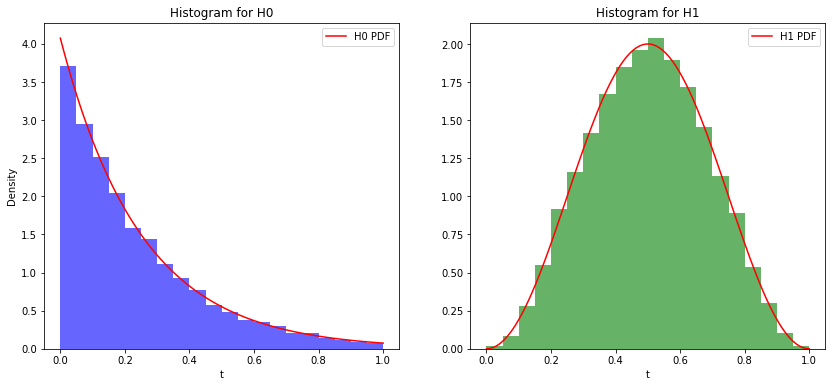

In [6]:
# Plot histograms and overlay theoretical PDF curves

samples_H0 = [nextValueForH0() for _ in range(N)]
samples_H1 = [nextValueForH1() for _ in range(N)]

fig, axes = plt.subplots(1, 2, figsize=(14, 6))

# H0 histogram
axes[0].hist(samples_H0, bins=20, density=True, alpha=0.6, color='blue', range=(0, 1))
t_vals = np.linspace(0, 1, 100)
axes[0].plot(t_vals, pdf_H0(t_vals), 'r-', label="H0 PDF")
axes[0].set_title("Histogram for H0")
axes[0].set_xlabel("t")
axes[0].set_ylabel("Density")
axes[0].legend()

# H1 histogram
axes[1].hist(samples_H1, bins=20, density=True, alpha=0.6, color='green', range=(0, 1))
axes[1].plot(t_vals, pdf_H1(t_vals), 'r-', label="H1 PDF")
axes[1].set_title("Histogram for H1")
axes[1].set_xlabel("t")
axes[1].legend()

plt.show()

The histogram of sampled values from  $H_0$  closely matches the theoretical curve of  $g(t | H_0) = 4.0746 \, e^{-4t}$

The histogram of sampled values from  $H_1$  closely matches the theoretical curve of  $g(t | H_1) = 2 \sin^2(\pi t)$